<a href="https://colab.research.google.com/github/Amirhatamian/ML-/blob/main/MLFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Image compression & Anomaly detection on ECG5000**

# Importing libraries and Load the MNIST DATASET

In [28]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model

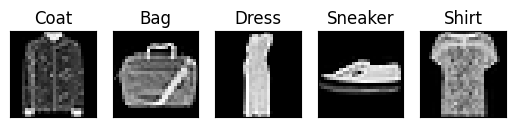

In [29]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define the labels dictionary
labels_dict = {
    '0': 'T-shirt/top',
    '1': 'Trouser',
    '2': 'Pullover',
    '3': 'Dress',
    '4': 'Coat',
    '5': 'Sandal',
    '6': 'Shirt',
    '7': 'Sneaker',
    '8': 'Bag',
    '9': 'Ankle boot',
    '10': 'Shoes'  # Added label for shoes
}

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Display original images with labels
n = 5
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(x_test[select_img_index])
    plt.title(labels_dict[str(y_test[select_img_index])])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Image Compression

In [30]:
# Set the number of dimensions for the latent space
latent_dim = 64

# Define an Autoencoder class that inherits from the TensorFlow Model class
class Autoencoder(Model):
    def __init__(self, latent_dim):
        # Initialize the Autoencoder with a specified latent dimension
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim

        # Define the encoder part of the Autoencoder
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),  # Flatten the input
          layers.Dense(latent_dim, activation='relu'),  # Dense layer with ReLU activation for encoding
        ])

        # Define the decoder part of the Autoencoder
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),  # Dense layer with sigmoid activation for decoding
          layers.Reshape((28, 28))  # Reshape the output to the original input shape
        ])

    def call(self, x):
        # Forward pass: encode and then decode the input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create an instance of the Autoencoder class with the specified latent dimension
autoencoder = Autoencoder(latent_dim)

In [31]:
# Configure the autoencoder model for training
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [32]:
# Train the autoencoder model using the specified training data and settings
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0239 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [33]:
# Display summaries of the encoder and decoder architectures
autoencoder.encoder.summary(), autoencoder.decoder.summary();


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 784)               50960     
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                            

In [34]:
# Obtain encoded and decoded representations of test data using the trained autoencoder
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

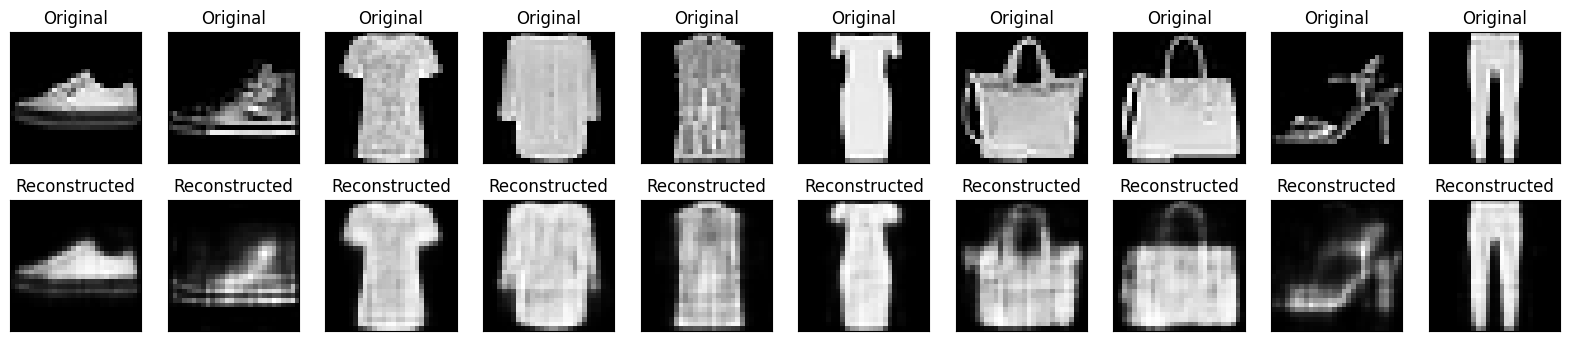

In [35]:
# Visualize original and reconstructed images for qualitative evaluation

# Set the number of images to display
n = 10

# Create a figure with a size of 20x4 inches
plt.figure(figsize=(20, 4))

# Iterate through a subset of images for display
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    # Randomly select an index from the test dataset
    select_img_index = np.random.randint(x_test.shape[0])  # Assuming x_test is defined
    # Plot the original image
    plt.imshow(np.squeeze(x_test[select_img_index]))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    # Plot the corresponding reconstructed image
    plt.imshow(np.squeeze(decoded_imgs[select_img_index]))  # Assuming decoded_imgs is defined
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the plot
plt.show()


# Image Denoising

In [36]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [37]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


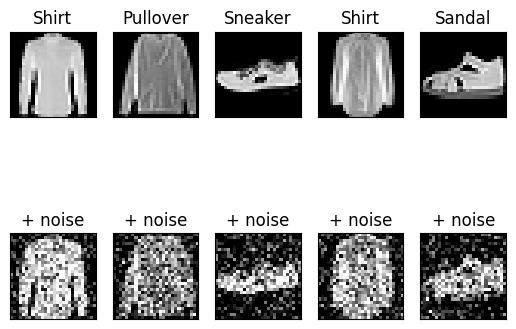

In [38]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


# display original + noisy image
n = 5
for i in range(n):
    # original
    ax = plt.subplot(2, n, i+1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(tf.squeeze(x_test[select_img_index]))
    plt.title(labels_dict[str(y_test[select_img_index])])
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # noisy
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(tf.squeeze(x_test_noisy[select_img_index]))
    plt.title('+ noise')
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        # The decoder upsamples the images back from 7x7 to 28x28.
        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()

In [40]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [41]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.0230 - val_loss: 0.0158
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0136 - val_loss: 0.0137
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 8/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0121 - val_loss: 0.0121
Epoch 9/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0119 - val_loss: 0.0119
Epoch 10/10
1875/1875 [==============================] - 45s 24m

In [42]:
autoencoder.encoder.summary(), autoencoder.decoder.summary();


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      


In [43]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

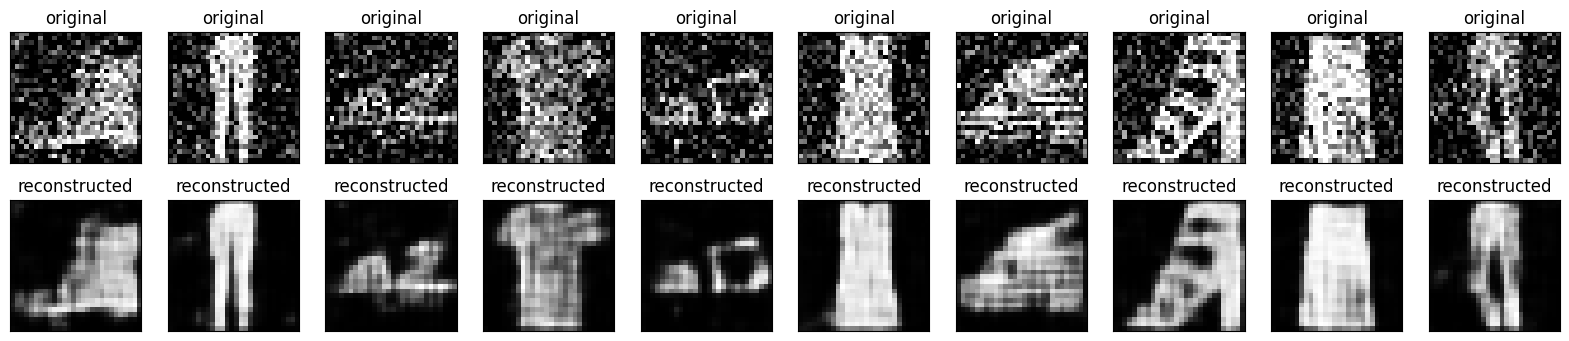

In [44]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    select_img_index = np.random.randint(x_test.shape[0])
    plt.imshow(tf.squeeze(x_test_noisy[select_img_index]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(decoded_imgs[select_img_index]))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Anomaly Detection

In [45]:
# Download the ECG dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)

# Extract the raw data values from the DataFrame
raw_data = dataframe.values

# Print the shape of the DataFrame and display the first few rows
print(dataframe.shape)
dataframe.head()


(4998, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [46]:
# Extract labels from the last column of the raw data
labels = raw_data[:, -1]

# Extract electrocardiogram data from all columns except the last one
data = raw_data[:, 0:-1]

# Split the data into training and testing sets along with corresponding labels
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)


In [47]:
# Normalize the training and test data to a 0 - 1 range
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

# Normalize the training data
train_data = (train_data - min_val) / (max_val - min_val)

# Normalize the test data using the same normalization parameters as the training data
test_data = (test_data - min_val) / (max_val - min_val)

# Convert the data to the float32 data type
train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)


In [48]:
# Convert labels to boolean type to distinguish between normal and anomalous instances
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

# Separate normal instances from training and testing data based on boolean labels
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

# Separate anomalous instances from training and testing data based on boolean labels
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

# Display the separated datasets: training data, normal test data, and anomalous training data
train_data, normal_test_data, anomalous_train_data


(<tf.Tensor: shape=(3998, 140), dtype=float32, numpy=
 array([[0.57030463, 0.46561658, 0.29058117, ..., 0.48504233, 0.4233502 ,
         0.47598344],
        [0.48320588, 0.28246963, 0.16471253, ..., 0.567567  , 0.4677294 ,
         0.2692329 ],
        [0.48144642, 0.35151404, 0.25972766, ..., 0.5479421 , 0.5077544 ,
         0.54298663],
        ...,
        [0.41039047, 0.24164985, 0.13120876, ..., 0.5277313 , 0.5654091 ,
         0.5023885 ],
        [0.5397748 , 0.4140786 , 0.28101394, ..., 0.51266515, 0.43706053,
         0.4426865 ],
        [0.29639772, 0.15988176, 0.18883787, ..., 0.53766966, 0.545786  ,
         0.40826708]], dtype=float32)>,
 <tf.Tensor: shape=(560, 140), dtype=float32, numpy=
 array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
         0.3713729 ],
        [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
         0.49527124],
        [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
         0.4754273 ]

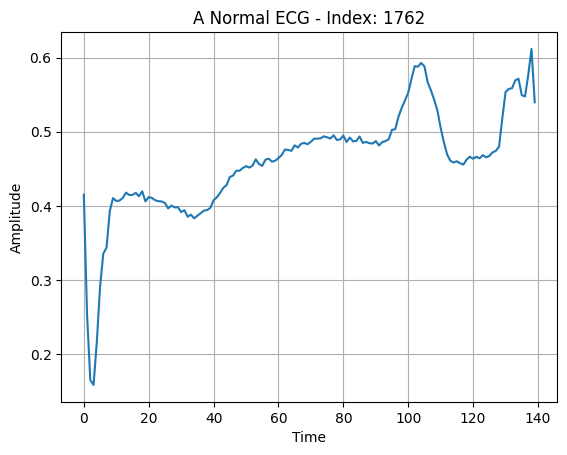

In [49]:
# Set up and display a plot for a randomly selected normal ECG from the training data

# Add a grid to the plot
plt.grid()

# Randomly select an index from the normal training data
selected_index = np.random.randint(normal_train_data.shape[0])

# Plot the ECG data against time
plt.plot(np.arange(140), normal_train_data[selected_index])

# Set the plot title with information about the selected index
plt.title(f"A Normal ECG - Index: {selected_index}")

# Set labels for the x-axis and y-axis
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Display the plot
plt.show()


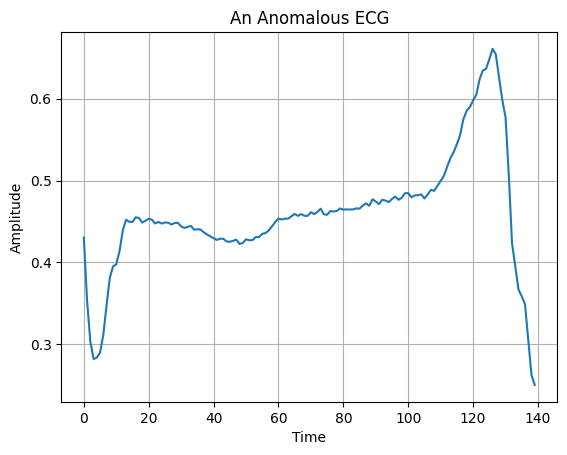

In [50]:
# Visualize an anomalous electrocardiogram (ECG) signal

# Add a grid for better readability
plt.grid()

# Plot the ECG signal over time
plt.plot(np.arange(140), anomalous_train_data[0])


plt.title("An Anomalous ECG")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [51]:
# Define an AnomalyDetector class that inherits from the TensorFlow Model class
class AnomalyDetector(Model):
    def __init__(self):
        # Initialize the AnomalyDetector with an encoder and decoder architecture
        super(AnomalyDetector, self).__init__()

        # Define the encoder architecture with Dense layers and ReLU activation functions
        self.encoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu", input_shape=(140,)),  # Adjust input_shape based on your data
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])

        # Define the decoder architecture with Dense layers and ReLU and Sigmoid activation functions
        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        # Forward pass: encode and then decode the input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create an instance of the AnomalyDetector class
autoencoder = AnomalyDetector()

In [52]:
# Define an AnomalyDetector class that inherits from the TensorFlow Model class
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()

        # Define the encoder part of the anomaly detector
        self.encoder = tf.keras.Sequential([
          layers.Dense(64, activation="relu", input_shape=(140,)),  # Dense layer for encoding with ReLU activation
          layers.Dropout(0.2),  # Adding dropout for regularization
          layers.Dense(32, activation="relu"),  # Dense layer with ReLU activation
          layers.BatchNormalization(),  # Adding batch normalization for stable training
          layers.Dense(16, activation="relu"),  # Dense layer with ReLU activation
          layers.Dense(8, activation="relu")])  # Dense layer with ReLU activation

        # Define the decoder part of the anomaly detector
        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),  # Dense layer with ReLU activation
          layers.BatchNormalization(),  # Adding batch normalization
          layers.Dense(32, activation="relu"),  # Dense layer with ReLU activation
          layers.Dense(64, activation="relu"),  # Dense layer with ReLU activation
          layers.Dropout(0.2),  # Adding dropout for regularization
          layers.Dense(140, activation="sigmoid")])  # Dense layer for decoding with sigmoid activation

    def call(self, x):
        # Forward pass: encode and then decode the input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create an instance of the AnomalyDetector class
autoencoder = AnomalyDetector()


In [53]:
# Configure the autoencoder model for training using Mean Absolute Error (MAE) as the loss function and Adam optimizer
autoencoder.compile(optimizer='adam', loss='mae')


In [54]:
# Train the autoencoder model on normal training data
history = autoencoder.fit(
    x=normal_train_data,
    y=normal_train_data,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_data),
    shuffle=True
)


Epoch 1/20
5/5 [==============================] - 6s 164ms/step - loss: 0.0720 - val_loss: 0.0534
Epoch 2/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0629 - val_loss: 0.0522
Epoch 3/20
5/5 [==============================] - 0s 25ms/step - loss: 0.0567 - val_loss: 0.0510
Epoch 4/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0516 - val_loss: 0.0497
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0474 - val_loss: 0.0484
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0437 - val_loss: 0.0469
Epoch 7/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0406 - val_loss: 0.0454
Epoch 8/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0381 - val_loss: 0.0441
Epoch 9/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0357 - val_loss: 0.0427
Epoch 10/20
5/5 [==============================] - 0s 25ms/step - loss: 0.0339 - val_loss: 0.0418
Epoch 11/20
5/5 [===========

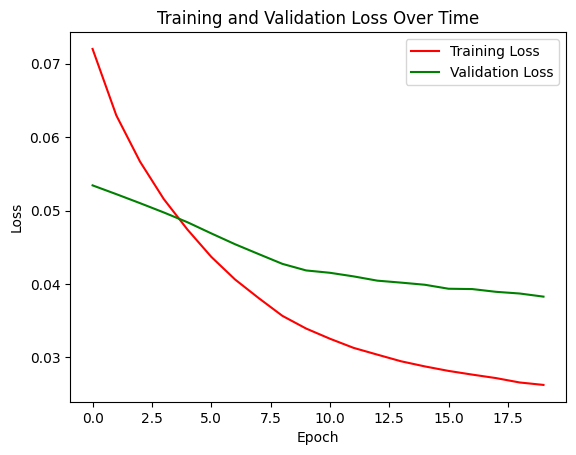

In [55]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss", color="Red")
plt.plot(history.history["val_loss"], label="Validation Loss", color="Green")

# Add labels and title
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Time")

# Display legend
plt.legend()

# Show the plot
plt.show()


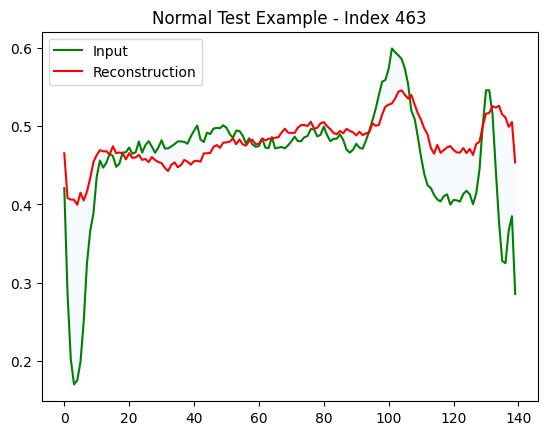

In [56]:
# Encode and decode a randomly selected example from the normal test data using the trained autoencoder
encoded_data = autoencoder.encoder(normal_test_data)
decoded_data = autoencoder.decoder(encoded_data)

# Randomly select an index from the normal test data
selected_index = np.random.randint(normal_test_data.shape[0])

# Plot the input and its reconstruction
plt.plot(normal_test_data[selected_index], label='Input', color='g')
plt.plot(decoded_data.numpy()[selected_index], label='Reconstruction', color='r')

# Compute the absolute error between the input and its reconstruction
error = np.abs(normal_test_data[selected_index] - decoded_data.numpy()[selected_index])

# Fill the area between the input and its reconstruction for better visualization
plt.fill_between(np.arange(140), decoded_data.numpy()[selected_index], normal_test_data[selected_index], color='aliceblue', alpha=0.5)

# Set the plot title and display legends
plt.title(f'Normal Test Example - Index {selected_index}')
plt.legend()

# Show the plot
plt.show()


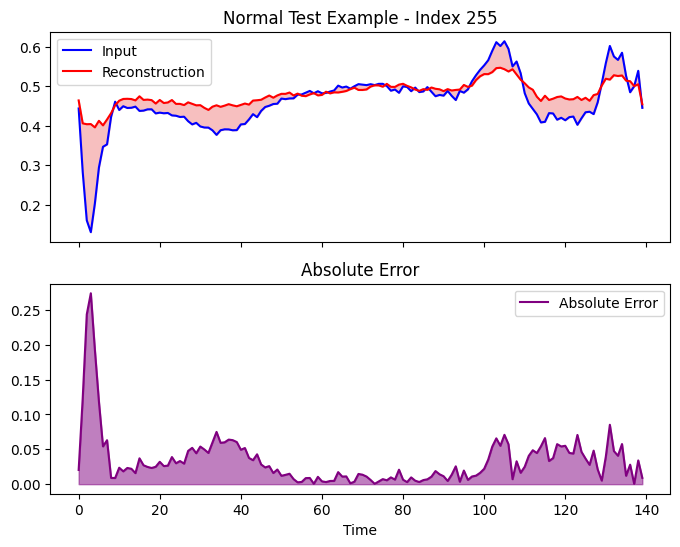

In [57]:
# Encode and decode normal test data using the trained autoencoder
encoded_data = autoencoder.encoder(normal_test_data)
decoded_data = autoencoder.decoder(encoded_data)

# Randomly select an index from the normal test data for visualization
selected_index = np.random.randint(normal_test_data.shape[0])

# Extract input data and its corresponding reconstruction
input_data = normal_test_data[selected_index]
reconstructed_data = decoded_data.numpy()[selected_index]

# Compute the absolute error between the input and its reconstruction
error = np.abs(input_data - reconstructed_data)

# Create subplots for visualization
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot Input and Reconstruction
ax1.plot(input_data, label='Input', color='b')
ax1.plot(reconstructed_data, label='Reconstruction', color='r')
ax1.fill_between(np.arange(140), reconstructed_data, input_data, color='lightcoral', alpha=0.5)
ax1.legend()
ax1.set_title(f'Normal Test Example - Index {selected_index}')

# Plot Error
ax2.plot(error, label='Absolute Error', color='purple')
ax2.fill_between(np.arange(140), 0, error, color='purple', alpha=0.5)
ax2.legend()
ax2.set_title('Absolute Error')

# Set common x-axis label
plt.xlabel('Time')

# Display the plots
plt.show()


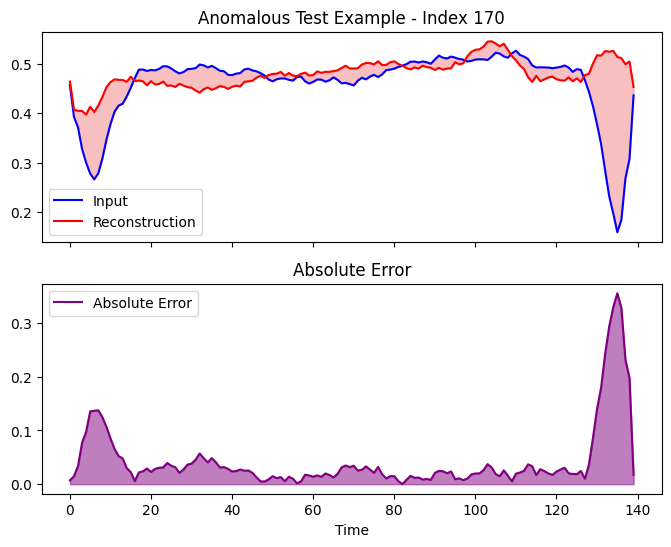

In [58]:
# Encode anomalous test data using the autoencoder's encoder
encoded_data_anomalous = autoencoder.encoder(anomalous_test_data)

# Decode the encoded data to obtain reconstructed data
decoded_data_anomalous = autoencoder.decoder(encoded_data_anomalous)

# Randomly select an index from the anomalous test data
selected_index_anomalous = np.random.randint(anomalous_test_data.shape[0])

# Retrieve the input data corresponding to the selected index
input_data_anomalous = anomalous_test_data[selected_index_anomalous]

# Retrieve the reconstructed data corresponding to the selected index
reconstructed_data_anomalous = decoded_data_anomalous.numpy()[selected_index_anomalous]

# Compute the absolute error between input and reconstructed data
error_anomalous = np.abs(input_data_anomalous - reconstructed_data_anomalous)

# Create subplots for visualization
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot Input and Reconstruction in the first subplot
ax1.plot(input_data_anomalous, label='Input', color='b')
ax1.plot(reconstructed_data_anomalous, label='Reconstruction', color='r')
ax1.fill_between(np.arange(140), reconstructed_data_anomalous, input_data_anomalous, color='lightcoral', alpha=0.5)
ax1.legend()
ax1.set_title(f'Anomalous Test Example - Index {selected_index_anomalous}')

# Plot Absolute Error in the second subplot
ax2.plot(error_anomalous, label='Absolute Error', color='purple')
ax2.fill_between(np.arange(140), 0, error_anomalous, color='purple', alpha=0.5)
ax2.legend()
ax2.set_title('Absolute Error')

# Set common x-axis label for both subplots
plt.xlabel('Time')

# Display the plots
plt.show()


74/74 [==============================] - 1s 5ms/step


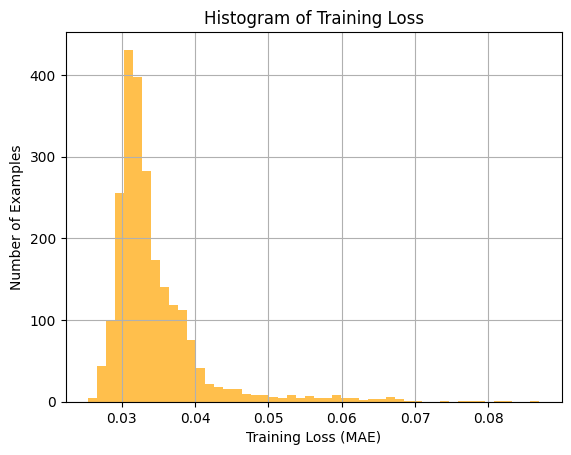

In [59]:
# Generate reconstructions of normal training data using the trained autoencoder
reconstructions = autoencoder.predict(normal_train_data)

# Calculate the Mean Absolute Error (MAE) between original and reconstructed normal training data
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

# Plot a histogram of the training loss to analyze the model's performance
plt.hist(train_loss, bins=50, color='orange', alpha=0.7)
plt.xlabel("Training Loss (MAE)")
plt.ylabel("Number of Examples")
plt.title("Histogram of Training Loss")
plt.grid(True)
plt.show()


In [60]:
# Calculate the anomaly detection threshold based on training loss statistics
threshold = np.mean(train_loss) + np.std(train_loss)

# Print the calculated threshold for anomaly detection
print(f"Anomaly Detection Threshold: {threshold:.4f}")


Anomaly Detection Threshold: 0.0409


14/14 [==============================] - 0s 2ms/step


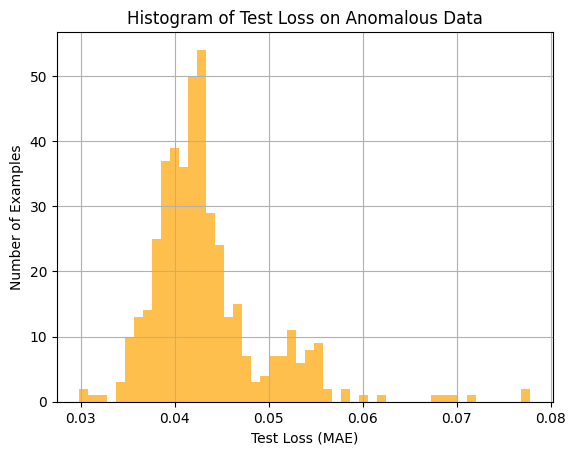

In [61]:
# Generate reconstructions of anomalous test data using the trained autoencoder
reconstructions = autoencoder.predict(anomalous_test_data)

# Calculate the Mean Absolute Error (MAE) between original and reconstructed anomalous test data
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

# Plot a histogram of the test loss to analyze the model's performance on anomalous data
plt.hist(test_loss, bins=50, color='orange', alpha=0.7)
plt.xlabel("Test Loss (MAE)")
plt.ylabel("Number of Examples")
plt.title("Histogram of Test Loss on Anomalous Data")
plt.grid(True)
plt.show()


In [62]:
# Define a function to make predictions using the autoencoder model
def predict(model, data, threshold):
    # Obtain reconstructions from the autoencoder model
    reconstructions = model(data)

    # Calculate Mean Absolute Error (MAE) between input data and reconstructions
    loss = tf.keras.losses.mean_absolute_error(reconstructions, data)

    # Threshold the loss values to make binary predictions (anomaly or not)
    predictions = tf.math.less(loss, threshold)

    # Convert boolean predictions to integers (0 for normal, 1 for anomaly)
    return predictions.numpy().astype(int)

# Define a function to print classification metrics based on predictions and labels
def print_stats(predictions, labels):
    # Use scikit-learn's classification_report to print precision, recall, and F1-score
    print(classification_report(labels, predictions))

# Make predictions using the autoencoder on the test data with a specified threshold
preds = predict(autoencoder, test_data, threshold)

# Print classification metrics based on the predicted and true labels
print_stats(preds, test_labels)


              precision    recall  f1-score   support

       False       0.86      0.63      0.73       440
        True       0.76      0.92      0.83       560

    accuracy                           0.79      1000
   macro avg       0.81      0.77      0.78      1000
weighted avg       0.80      0.79      0.78      1000



In [63]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.791
Precision = 0.7592319054652881
Recall = 0.9178571428571428
